<a href="https://colab.research.google.com/github/osgeokr/torchgeo-explained/blob/main/TorchGeo_NWPU_VHR-10_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C_%EB%B0%A9%EB%B2%95_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TorchGeo: NWPU VHR-10 데이터셋 다운로드 방법 소개

[TorchGeo](https://torchgeo.readthedocs.io/en/stable/)는 torchvision과 유사한 PyTorch 도메인 라이브러리로, 지리공간 데이터에 특화된 데이터셋, 샘플러, 변환, 그리고 사전 훈련된 모델을 제공합니다. 이번 실습은 TorchGeo에서 NWPU VHR-10 데이터셋 쉽게 다운로드받는 방법을 소개해 보겠습니다.

[VHR-10](https://torchgeo.readthedocs.io/en/stable/api/datasets.html#vhr-10)은 중국 서북공업대학교(NWPU: Northwestern Polytechnical University)에서 제공하는 초고해상도(Very High Resolution) 10개 클래스 원격탐사 이미지 데이터셋입니다.

총 800장의 초고해상도(VHR) 광학 원격탐사 이미지로 구성되어 있으며, 이 중 715장의 컬러 이미지는 Google Earth로부터 0.5에서 2m 사이의 공간 해상도로 획득되었고, 나머지 85장의 팬 샤프닝된 컬러 적외선(CIR: Color InfraRed) 이미지는 [Vaihingen(바이힝겐)](https://www.isprs.org/education/benchmarks/UrbanSemLab/2d-sem-label-vaihingen.aspx) 데이터로부터 0.08m 공간해상도로 획득되었습니다.

  > Note: [팬 샤프닝(pan-sharpening)](https://earthobservatory.nasa.gov/blogs/earthmatters/2017/06/13/how-to-pan-sharpen-landsat-imagery/)은 팬크로매틱 밴드의 고해상도의 디테일과 다른 밴드의 저해상도 색상 정보를 결합하는 기술입니다.

데이터셋은 두 세트로 나뉩니다:
- Positive image set(양성 이미지 세트: 650장): 이미지 내에 적어도 하나의 대상이 포함되어 있는 이미지
- Negative image set(음성 이미지 세트: 150장): 어떤 대상도 포함하지 않은 이미지

양성 이미지 세트는 다음과 같은 열 클래스의 객체를 포함합니다:
- Airplanes(비행기) (757)
- Ships(배) (302)
- Storage tanks(저장 탱크) (655)
- Baseball diamonds(야구장) (390)
- Tennis courts(테니스 코트) (524)
- Basketball courts(농구장) (159)
- Ground track fields(육상 트랙 필드) (163)
- Harbors(항구) (224)
- Bridges(다리) (124)
- Vehicles(차량) (477)

이는 객체 탐지 바운딩 박스(object detection bounding boxes)와 인스턴스 분할 마스크(instance segmentation masks)를 포함합니다.
  > Note: [인스턴스 분할(instance segmentation)](https://www.ibm.com/topics/instance-segmentation)은 이미지 내의 각 개별 객체 인스턴스의 정확한 픽셀별 경계를 예측하는 딥러닝 기반 컴퓨터 비전 작업입니다. 이미지 분할의 더 큰 분야의 일부인 인스턴스 분할은 기존 객체 탐지 알고리즘보다 더 자세하고 정교한 출력을 제공합니다. 다른 이미지 분할 작업에는 각 픽셀을 그것이 대표하는 '사물' 또는 '배경요소'의 의미적 분류로 분류하는 의미적 분할(semantic segmentation)과, 인스턴스 분할 및 의미적 분할의 목표를 모두 결합하는 파노픽 분할(panoptic segmentation)이 포함됩니다. 인스턴스 분할은 의료 이미지 분석부터 위성 이미지에서 관심 객체 탐지, 자율 주행 차량의 탐색 활성화에 이르기까지 다양한 산업에서 다양한 이미지 처리 사용 사례를 가지고 있습니다.

이 데이터셋을 연구에 사용하는 경우, 다음 논문들을 인용해야 합니다:
- https://doi.org/10.1016/j.isprsjprs.2014.10.002
- https://doi.org/10.1109/IGARSS.2019.8898573
- https://doi.org/10.3390/rs12060989

TorchGeo 문서는 이 데이터셋을 사용하기 위한 추가 라이브러리를 다음과 같이 안내하고 있습니다:

- 데이터셋이 RAR 파일로 저장되어 있으므로, 이를 추출하기 위한 [rarfile](https://pypi.org/project/rarfile/)
- "양성" 이미지 세트에 대한 annotations.json 파일을 불러오기 위한 [pycocotools](https://pypi.org/project/pycocotools/)
  > Note: pycocotools는 원본 [cocoapi](https://github.com/cocodataset/cocoapi)의 포크입니다. [COCO](http://cocodataset.org/)는 객체 감지, 분할, 사람 키포인트 감지, 배경요소 분할, 그리고 캡션 생성을 위해 설계된 대규모 이미지 데이터셋입니다.
  
그러나, 실제로는 안내된 추가 라이브러리 이외에도 고려해야할 부분들이 있습니다. 이와 관련해서 저는 [How to Download the VHR Dataset](https://github.com/microsoft/torchgeo/discussions/1944) 토론에서 얻은 정보를 공유해 봅니다.

## VHR-10 데이터셋 다운로드를 위한 기본 코드

TorchGeo는 `pip install torchgeo`를 비교적 가볍게 만들기 위해 필수 의존성 세트만 설치하고 있습니다. 선택적 의존성 세트를 포함한 전체 설치는 `pip install torchgeo[datasets]`를 사용하시면 됩니다. 후자로 설치한다면 VHR-10 데이터셋 사용을 위한 `rarfile`과 `pycocotools`는 자동 설치됩니다. 관련하여 [Required vs. optional dependencies](https://github.com/microsoft/torchgeo/discussions/662) 토론을 참고하시면 좋겠습니다.

- `pip install torchgeo`: "필수(Required)" 의존성 세트 설치
- `pip install torchgeo[datasets]`:  "선택적(Optional)" 의존성 세트를 포함한 전체 설치

In [ ]:
%pip install -q -U torchgeo[datasets]

필요한 라이브러리를 임포트하고, TorchGeo의 버전을 확인합니다.

In [ ]:
import torchgeo
from torchgeo.datasets import VHR10
import matplotlib.pyplot as plt

torchgeo.__version__

'0.5.2'

아래 코드는 `VHR10` 데이터셋을 `data/VHR10/` 위치에서 'positive' 분할로 다운로드하고, 주어진 전처리 함수를 이용하여 변환을 적용합니다. `preprocess` 함수의 역할은 각 이미지를 부동소수점 타입으로 변환하고, 0과 1 사이의 값으로 정규화하기 위해 255로 나누는 것입니다. 이 과정은 모델 학습에 적합한 데이터 형태로 가공하는 데 도움을 줍니다.

In [ ]:
def preprocess(sample):
    sample["image"] = sample["image"].float() / 255.0
    return sample

ds = VHR10(
    root="data/VHR10/",
    split="positive",
    transforms=preprocess,
    download=True,
    checksum=True,
)

Downloading...
From (original): https://drive.google.com/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE
From (redirected): https://drive.usercontent.google.com/download?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE&confirm=t&uuid=a2b4ff05-9387-44aa-96c3-f29c1ed98b4f
To: D:\GEODATA\torchgeo-explained\data\VHR10\NWPU VHR-10 dataset.rar
100%|█████████████████████████████████████████████████████████████████████████████| 76.8M/76.8M [00:02<00:00, 31.8MB/s]


Extracting data/VHR10/NWPU VHR-10 dataset.rar to data/VHR10/


100%|██████████████████████████████████████████████████████████████████| 1265416/1265416 [00:00<00:00, 33366900.47it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


### 오류 유형1: gdown 모듈 미설치

TorchGeo는 Google Drive에서 NWPU VHR-10 dataset.rar 파일을 다운로드 합니다. `gdown` 모듈이 시스템에 설치되어 있지 않는 경우 `ModuleNotFoundError: No module named 'gdown'` 오류를 경험할 수 있습니다. 따라서 `pip install gdown` 명령을 실행하여 gdown 모듈을 추가 설치합니다.

In [ ]:
%pip install -q -U gdown

### 오류 유형 2: unrar 미설치

`rarfile` 패키지는 rar 포맷의 압축 파일을 해제하는데 `unrar`를 필요로 합니다. `unrar`가 시스템에 설치되어 있지 않은 경우 `RarCannotExec: Cannot find working tool error` 또는 `RarCannotExec: Unrar not installed` 오류가 발생할 수 있습니다. 이 경우에는 `unrar`는 [직접 설치](https://gnuwin32.sourceforge.net/packages/unrar.htm)해야 합니다. 저는 Windows에서 Complete package 파일을 설치하여 문제를 해결했습니다. 이때 환경변수 중 PATH에 'C:\Program Files (x86)\GnuWin32\bin'를 추가하였습니다.

### 오류 유형3: Google Drive 파일 URL 검색 오류

Google Colab에서는 gdown 모듈 설치가 불필요하지만, 또다른 오류를 경험할 수 있습니다: `FileURLRetrievalError: Cannot retrieve the public link of the file. You may need to change the permission to 'Anyone with the link', or have had many accesses.`. Google Drive에서 데이터셋을 다운로드 하는 문제는 오래전부터 [토론](https://github.com/pytorch/vision/pull/8237)되어 왔습니다. Colab에서 아래 변경된 코드로 NWPU VHR-10 dataset.rar 파일을 먼저 다운로드한 후, 기본 코드를 다시 실행하면 해당 오류를 우회할 수 있습니다. 이렇게 하면 Colab에서는 문제 없이 VHR-10 데이터셋을 사용할 수 있습니다.

In [ ]:
import os, gdown

os.makedirs('data/VHR10/', exist_ok=True)

url = 'https://drive.google.com/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE'
output_path = 'data/VHR10/NWPU VHR-10 dataset.rar'
gdown.download(url, output_path, quiet=False)

## VHR-10 데이터셋 열어보기

이제 양성 이미지 세트를 확인해 봅니다. 이미지는 총 650장입니다.

In [ ]:
print(f"VHR-10 dataset: {len(ds)}")

VHR-10 dataset: 650


`ds` 데이터셋의 첫번째 항목에 접근하여 `"image"` 키에 해당하는 이미지의 차원을 확인해 봅니다. `shape` 속성은 해당 이미지의 차원을 반환하는데 (채널 수, 높이, 너비) 형태로 표현됩니다.

In [ ]:
ds[0]["image"].shape

torch.Size([3, 808, 958])

임의로 여섯번째 항목의 이미지를 열어보겠습니다. 이미지의 차원을 (채널 수, 높이, 너비)에서 (높이, 너비, 채널 수)로 변경한 후 표시해 보겠습니다.

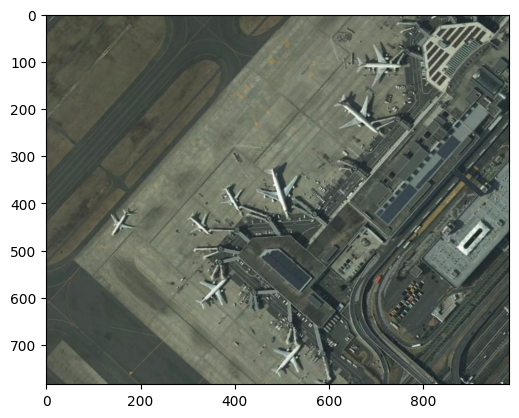

In [ ]:
image = ds[5]["image"].permute(1, 2, 0)
plt.imshow(image)
plt.show()

TorchGeo의 VHR10 데이터셋에는 `annotations.json`에 포함된 주석을 시각화하는 `plot` 메서드가 있습니다. 이 주석들은 객체 탐지와 인스턴스 분할을 위한 정보를 제공하며, 바운딩 박스와 마스크 같은 시각적 요소들을 포함할 수 있습니다. 이를 통해 지상 실측값(ground truth)이 표기된 이미지를 직접 시각화하고 확인할 수 있습니다. Microsoft AI for Good의 케일럽 로빈슨(Caleb Robinson) 님이 제공하는 [torchgeo_object_detection_example.ipynb](https://gist.github.com/calebrob6/d32673997661a75d1a5e2e5c0afbe68a)를 통해, TorchGeo에서의 객체 탐지 훈련에 대한 예시를 경험해볼 수 있습니다.

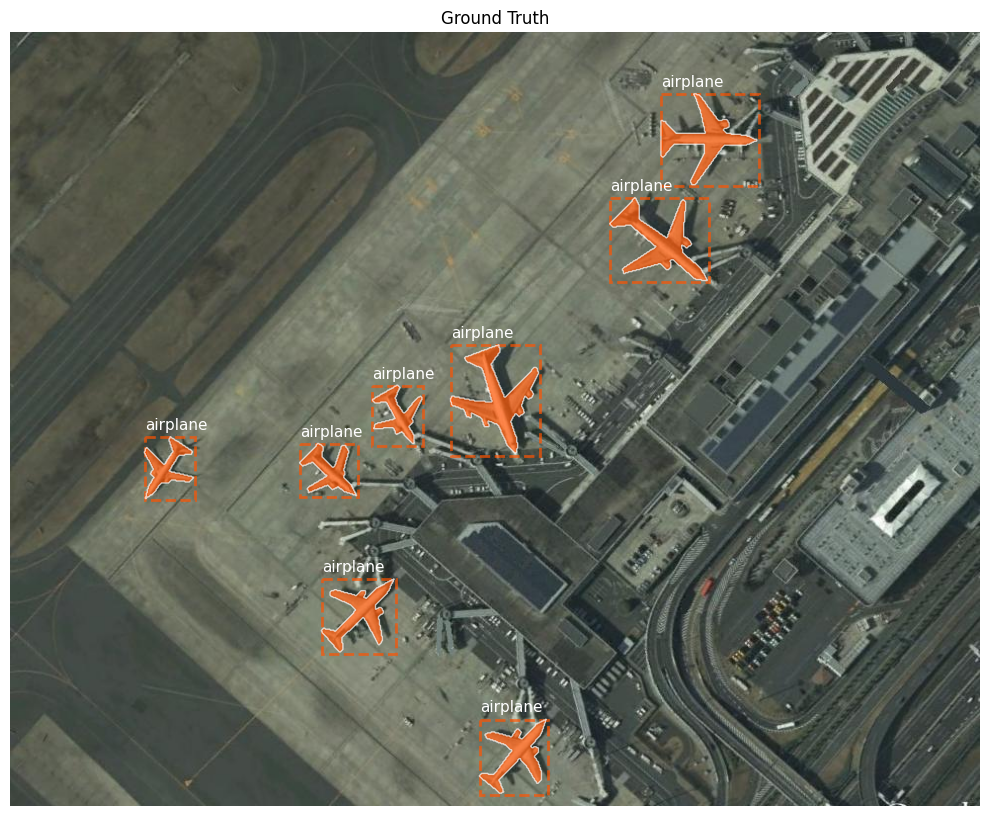

In [ ]:
ds.plot(ds[5])
plt.savefig('ground_truth.png', bbox_inches='tight')
plt.show()